In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from  sklearn.ensemble  import  GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

##载入示例数据 10维度
X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)##test_size测试集合所占比例

In [2]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) )
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) )

AUC Score : 0.974248
Accuracy : 0.8995


In [3]:
auc_Score=[]
accuracy=[]
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print( "AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) )
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.972424
Accuracy : 0.8993


In [4]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=100, #树的个数
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) )
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) )
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.978546
Accuracy : 0.9133


In [5]:
param_test1 = {
 'max_depth':range(3,10),
 'min_child_weight':range(1,12)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
auc_Score.append(gsearch1.best_score_)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 5}, 0.9838773907351648)

In [6]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
auc_Score.append(gsearch2.best_score_)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.3}, 0.9840209676917736)

In [8]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
auc_Score.append(gsearch3.best_score_)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.9848344348992006)

In [12]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.001, 0.005, 0.01, 0.05, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4 ,scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
auc_Score.append(gsearch4.best_score_)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 1e-05}, 0.9848249828668745)

In [14]:
param_test5 = {
 'n_estimators':[100,140,200,500,1000,1500]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
                                                  reg_alpha = 1e-05,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
auc_Score.append(gsearch5.best_score_)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 200}, 0.9856432188465261)

In [16]:
param_test6 = {
'learning_rate':[0.01,0.02,0.05,0.1,0.3]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=9,
                                                   reg_alpha = 1e-05,
 min_child_weight=5, gamma=0.3, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
auc_Score.append(gsearch6.best_score_)
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.1}, 0.9856432188465261)

In [17]:
#最优
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=200, #树的个数
 max_depth=9,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 reg_alpha = 1e-05,
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro) )
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre) )
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.987214
Accuracy : 0.9362


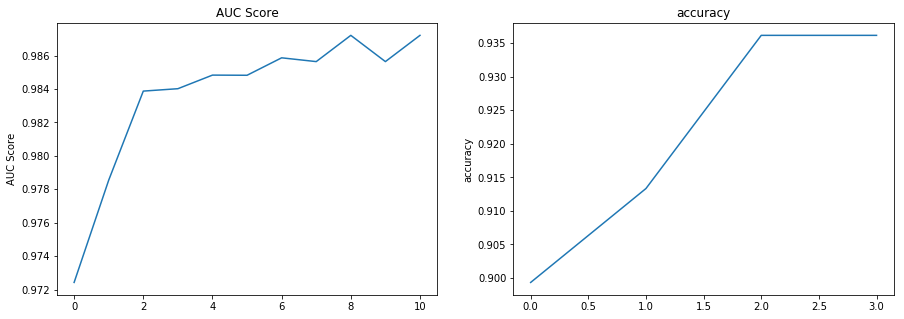

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
p1=fig.add_subplot(1,2,1)
p1.plot(auc_Score)
p1.set_ylabel('AUC Score')
p1.set_title('AUC Score')
p2=fig.add_subplot(1,2,2)
p2.plot(accuracy)
p2.set_ylabel('accuracy')
p2.set_title('accuracy')
plt.show()
#plt.show()